In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import stft, istft
from scipy.io import wavfile as wav
from scipy.signal import periodogram, welch

In [6]:
noise1_file = "noise1.wav"
noise2_file = "noise2.wav"
noise3_file = "noise3.wav"

# load data from wave file
fs, noise1 = wavfile.read(noise1_file)
fs, noise2 = wavfile.read(noise2_file)
fs, noise3 = wavfile.read(noise3_file)

fs_music, music = wavfile.read("music.wav")

print(fs, fs_music)

16000 16000


In [7]:
from scipy.signal import stft, istft

# bruit blanc
sigma = get_sigma(music, 20)
music_b1 = music + 0.05 * noise1

f, t, music_1b_st = stft(music_b1, fs, nperseg=1000, noverlap=1000//2)

NameError: name 'get_sigma' is not defined

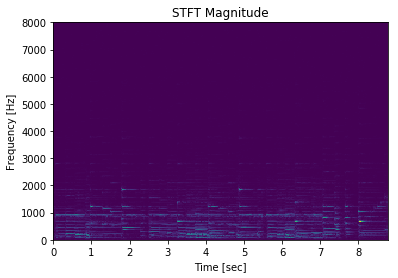

In [67]:
def plot_stft(f, t, st):
    plt.pcolormesh(t, f, np.abs(st), vmin=0)
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    
plot_stft(f, t, music_1b_st)

In [8]:
def plot_signal(signal_1, signal_2):
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(signal_1)
    plt.subplot(2, 1, 2)
    plt.plot(signal_2)
    plt.show()

def getSnf(noise, alpha):
    f, t, bruit_1b_st = stft(noise, fs, nperseg=1000, noverlap=1000//2)
    # Pour chaque frequence on fait la moyenne temporelle
    snf = (bruit_1b_st**alpha).mean(1)
    snf_ext = np.transpose(np.repeat([snf], 282, axis=0))
    return snf_ext

def getSignalDeNoise(y, snf, alpha, beta):
    A = ((y**alpha - snf)/((y**alpha)+0.000000000001))**(beta)
    x = A*y
    return x

alpha = 2
beta = 2
snf = getSnf(noise1, alpha)
music_dn_st = getSignalDeNoise(music_1b_st, snf, alpha, beta)

t, music_dn = istft(music_dn_st, fs, nperseg=1000, noverlap=1000//2)

print(music_dn)
print(music_b1)

plot_signal(music, music_b1)
plot_signal(music, music_dn)

    

NameError: name 'music_1b_st' is not defined

In [79]:
wavfile.write("musicDn.wav", fs, np.int16(music_dn))
wavfile.write("musicB1.wav", fs, np.int16(music_b1))
                       